## <center>Computer Science Intensive Course - MindX</center>
![](./assets/logo.png)
# <center>LAB 12. THUẬT TOÁN TÌM ĐƯỜNG (2)</center>

## Bài 1. Kích Thước Tầng

Kích thước của một tầng trong cây nhị phân được định nghĩa là số node trên tầng đó.

**Yêu cầu**: Cho một cây nhị phân có không quá 1000 node và một số nguyên *k*. Hãy tìm kích thước của tầng thứ *k*, biết các tầng được đánh số từ 0, bắt đầu từ node gốc.

**Input**: Một cây nhị phân chứa số nguyên và một số nguyên *-10<sup>6</sup> < k < 10<sup>6</sup>*.  
**Output**: Một số nguyên là kích thước của tầng *k*. Trả về 0 nếu cây không chứa tầng thứ *k*.  
**Ví dụ**:  

- Input: <code>root</code>, 2
- Output: 3
- Giải thích: Ở tầng thứ hai có 3 node là [1, 6, 14]

![](./assets/binary-search-tree.png)

In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

root = Node(8)
root.left, root.right = Node(3), Node(10)
root.left.left, root.left.right = Node(1), Node(6)
root.left.right.left, root.left.right.right = Node(4), Node(7)
root.right.right = Node(14)
root.right.right.left = Node(13)

## Cach 1

In [3]:
from collections import deque
def find_level_size(root, level):
    # th ngoai le
    if level < 0 or level > 998:
        return 0
    # th da tim thay
    if level == 0:
        return 1

    # khai bao hang doi cho BFS
    queue = deque()
    queue.append(root)

    # vong lap cho moi level => den khi gap duoc level can xet
    for i in range(level):
      # lay do rong cua level hien tai
      level_size = len(queue)
      if level_size == 0:
        return 0 # khong co con de xet them

      # duyet cac node trong level hien tai
      for j in range(level_size):
        node = queue.popleft()
        if node.left:
          queue.append(node.left)
        if node.right:
          queue.append(node.right)

    return len(queue)

In [4]:
find_level_size(root, 2)

3

## Cach 2

In [17]:
def dfs (node, current_level, level, count):
  # neu node khong co con
  if node == None:
    return count
  # tim thay level hien tai
  if current_level == level:
    count[0] += 1
  else:
    if node.left:
      dfs(node.left, current_level + 1, level, count)
    if node.right:
      dfs(node.right, current_level + 1, level, count)

def find_level_size1(root, level):
  # th ngoai le
  if level < 0 or level > 998:
    return 0
  if level == 0:
    return 1

  # khai bao bien
  count = [0]
  dfs(root, 0, level, count)
  return count[0]

In [18]:
find_level_size1(root, 2)

3

## Bài 2. Thoát Khỏi Mê Cung

Ở bài trước, ta đã dùng DFS để tạo mê cung. Tuy nhiên, thuật toán DFS không đảm bảo ta tìm được đường ngắn nhất để thoát khỏi mê cung.  

Do đó, ta sẽ dùng thuật toán BFS để tìm đường ngắn nhất:
- Bắt đầu duyệt mê cung từ ô trên cùng bên trái.
- Ở mỗi bước duyệt, kiểm tra xem có thể đi từ ô hiện tại sang các ô cùng cạnh hay không bằng cách kiểm tra các mảng <code>vertical</code> và <code>horizontal</code>. Khi sang một ô mới, lưu ô liền trước nó để truy vấn lại đường đi.
- Kết thúc duyệt khi tìm thấy ô dưới cùng bên phải. Do mê cung ta tạo đảm bảo luôn có lối thoát nên không cần xử lý trường hợp không tìm thấy đường ra.
   
**Ví dụ** về đường đi ngắn nhất để thoát khỏi mê cung:
![](./assets/solve_maze.png)

Hàm <code>plot_maze_with_path()</code> để vẽ mê cung từ <code>vertical</code>, <code>horizontal</code> và vẽ đường đi từ <code>path</code> đã được viết sẵn.

In [21]:
import matplotlib.pyplot as plt

plt.style.use('default')

def plot_maze_with_path(vertical, horizontal, path=None, before=None, fig_height=8):

    # init height & width
    height = len(vertical)
    width = len(vertical[0])

    # init figure
    fig = plt.figure(figsize=(fig_height*2, fig_height))
    fig.patch.set_visible(False)

    # draw maze borders
    for row in range(height):
        for col in range(width):
            if vertical[row][col]:
                plt.plot((col, col), (row, row+1), color='white')
            if horizontal[row][col]:
                plt.plot((col, col+1), (row, row), color='white')

    # draw surrounding borders on the right & bottom
    plt.plot((width, width), (0, height-1), color='white')
    plt.plot((0, width), (height, height), color='white')

    # styling the plot
    ax = plt.gca()
    ax.set_facecolor((0, 0, 0))
    ax.set_ylim(ax.get_ylim()[::-1])
    plt.xticks([])
    plt.yticks([])

    # add arrows
    plt.arrow(0, 0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')
    plt.arrow(width-0.8, height-0.5, 0.8, 0, width=0.07, length_includes_head=True, color='white')

    # plot path
    if path != None:
        last_step = (0, -0.5)
        for step in path + [(height-1, width-0.5)]:
            plt.plot((last_step[1]+0.5, step[1]+0.5), (last_step[0]+0.5, step[0]+0.5), color='cyan', linestyle='-.')
            last_step = step

    # plot every paths
    if before != None:
        for row in range(height):
            for col in range(width):
                if before[row][col] != None:
                    last_step = before[row][col]
                    plt.plot((last_step[1]+0.5, col+0.5), (last_step[0]+0.5, row+0.5), color='yellow', linestyle='-.')

    plt.show()

Các mảng <code>vertical</code> và <code>horizontal</code> được định nghĩa như bài trước.  

Ta cần tìm mảng <code>path</code> chứa đường đi ngắn nhất để thoát khỏi mê cung. Mỗi phần tử trong mảng là một tuple chứa tọa độ của một ô trên đường đi, được lưu theo dạng (<code>row</code>, <code>column</code>).

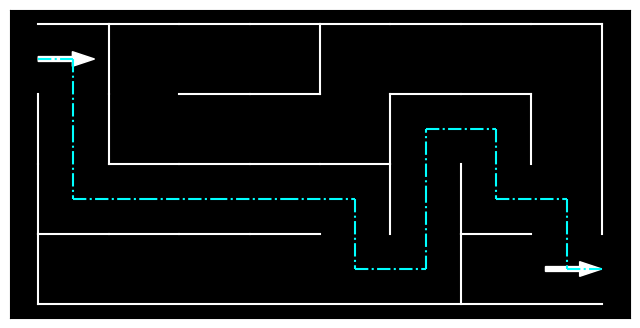

In [22]:
vertical = [
    [False, True, False, False, True, False, False, False],
    [True, True, False, False, False, True, False, True],
    [True, False, False, False, False, True, True, False],
    [True, False, False, False, False, False, True, False]]
horizontal = [
    [True, True, True, True, True, True, True, True],
    [False, False, True, True, False, True, True, False],
    [False, True, True, True, True, False, False, False],
    [True, True, True, True, False, False, True, False]]

path = [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (3, 5), (2, 5), (1, 5), (1, 6), (2, 6), (2, 7), (3, 7)]

plot_maze_with_path(vertical, horizontal, path=path, fig_height=4)

**Yêu cầu**: Hãy hiện thực hàm <code>find_path()</code> nhận vào <code>vertical</code>, <code>horizontal</code> và trả về đường đi <code>path</code> theo định dạng như trên.

In [23]:
from IPython import display
import time

def bfs(vertical, horizontal):
  # khai bao bien do dai
  height = len(vertical)
  width = len(vertical[0])

  # khai bao hang doi cho BFS
  queue = deque()
  # danh sach chua di qua + visited
  visited = [[False]*width for _ in range(height)]
  before = [[None]*width for _ in range(height)]

  # them not bat dau
  queue.append((0, 0))
  visited[0][0] = True

  # vong lap BFS
  while len(queue) > 0:
    # kiem tra not tiep theo
    row, col = queue.popleft()

    # xet 4 huong xung quanh
    for i, j in [(row-1, col), (row, col-1), (row+1, col), (row, col+1)]:
      if i >= 0 or i < height or j >= 0 or j < width and not visited[i][j]:
        # kiem tra tuong giua 2 o lien tiep
        has_wall = (i == row and vertical[i][max(j, col)]) or (j == col and horizontal[max(i, row)][j])
        if not has_wall:
          # them vao hang doi
          queue.append((i, j))
          visited[i][j] = True
          before[i][j] = (row, col)

          # ve + set thoi gian cho tao map
          time.sleep(0.2)
          display.clear_output(wait=True)
          plot_maze_with_path(vertical, horizontal, before=before)

          # tim duoc duong
          if i == height and j == width-1:
            return before
  return None

def find_path(vertical, horizontal):
  before = bfs(vertical, horizontal)
  # khai bao chieu dai
  height = len(vertical)
  width = len(vertical[0])

  # lay duong di tu danh sach before
  path = []
  vertex = (height-1, width-1)
  while vertex != None:
    path.append(vertex)
    vertex = before[vertex[0]][vertex[1]]
  path.append((0, 0))
  # dao nguoc duong di
  path.reverse()
  return path

Kết quả mong đợi như bên dưới:

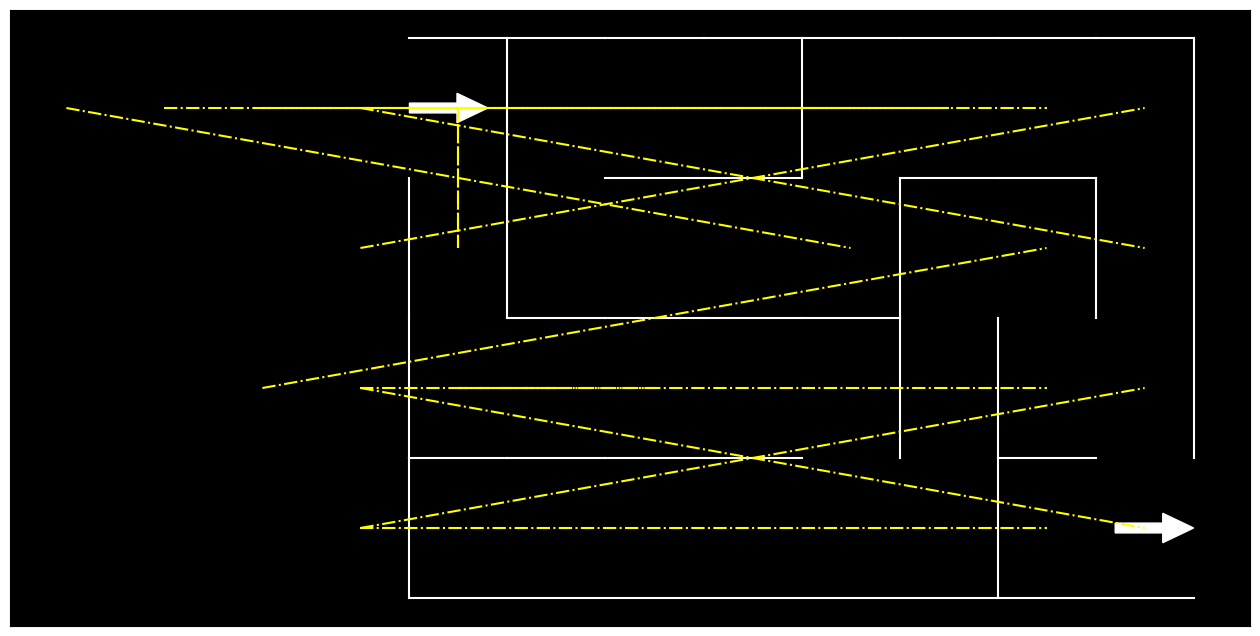

IndexError: list index out of range

In [ ]:
path = find_path(vertical, horizontal)
plot_maze_with_path(vertical, horizontal, path=path, fig_height=4)

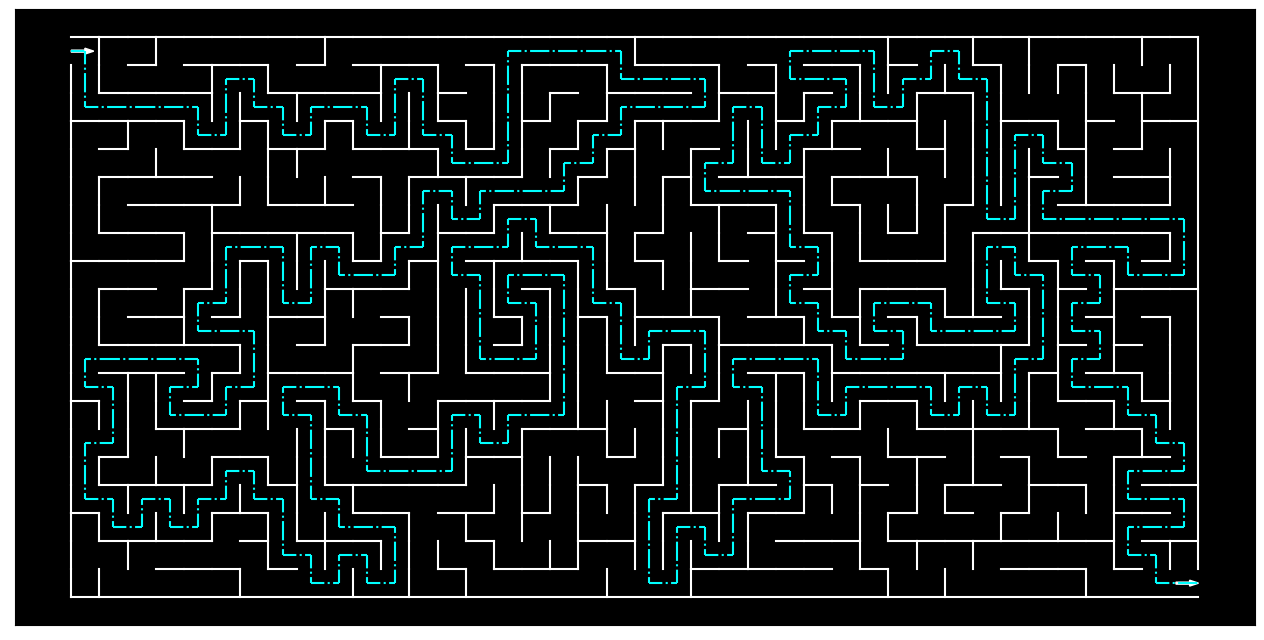

In [ ]:
vertical = [[False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, True, False], [True, True, False, False, False, True, False, True, False, False, False, True, False, True, False, True, True, False, False, True, False, False, False, True, False, True, False, False, True, True, False, True, False, True, True, True, True, True, False, True], [True, False, False, False, False, True, True, False, True, False, False, True, True, True, False, True, True, True, False, True, False, False, False, True, False, True, True, False, True, False, True, False, True, True, False, False, True, False, True, False], [True, False, True, False, True, False, True, True, False, True, True, False, True, False, True, True, True, False, True, False, True, True, False, False, True, True, False, True, False, False, True, True, True, True, False, True, True, False, True, False], [True, False, False, True, False, False, False, True, True, False, False, False, False, True, False, False, True, True, False, True, True, False, True, False, True, False, True, False, False, True, False, True, True, True, True, False, True, False, False, True], [True, True, False, False, False, False, True, True, False, True, False, True, True, False, True, False, False, False, True, False, True, True, True, False, False, False, True, True, False, False, True, False, True, True, True, False, True, False, False, True], [True, True, False, False, False, True, False, False, False, False, False, True, True, True, False, True, False, True, False, True, False, True, False, True, False, True, True, False, True, True, True, True, False, False, True, False, False, False, False, False], [True, False, False, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False, True, True, False, True, True, False, True, False, True, True, False, False, True, True, False, True, False, False, False, False, True], [True, False, False, False, False, True, True, True, True, True, False, False, True, True, False, True, False, False, True, True, False, True, True, False, False, True, False, True, False, False, False, False, True, True, False, True, False, True, False, False], [True, True, False, False, True, False, True, True, False, True, True, False, False, True, True, True, False, True, True, False, True, False, True, False, False, True, False, True, True, False, False, True, True, False, True, True, False, True, False, False], [True, True, False, False, True, False, False, True, False, True, False, False, True, True, True, False, True, True, True, True, True, False, False, True, False, False, True, False, True, False, True, False, False, False, True, True, False, True, False, True], [True, False, False, False, False, False, True, True, False, False, True, False, False, True, True, False, False, True, True, True, False, True, True, True, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, True], [True, False, True, True, False, True, False, True, False, False, True, False, True, False, False, False, False, True, True, False, False, True, False, True, False, True, True, True, False, False, False, True, False, True, True, True, False, False, True, True], [True, True, True, True, False, False, True, True, False, True, False, True, False, True, False, True, False, False, True, True, False, True, True, False, True, True, True, False, True, False, True, False, True, False, True, False, False, True, False, True], [True, False, True, False, True, False, False, False, True, True, True, True, False, True, True, False, True, False, False, True, True, True, True, True, True, True, False, False, False, True, False, False, True, False, False, True, False, False, True, False], [True, True, False, True, False, True, False, True, True, True, False, False, False, False, True, False, True, True, True, False, False, True, True, False, True, False, True, False, True, False, True, False, True, False, True, False, False, True, False, False], [True, False, True, False, True, False, True, False, True, False, True, False, False, False, False, True, True, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, False, False, True, False, True, True, False, False], [True, True, False, True, False, True, False, True, True, True, False, False, True, False, True, False, True, False, True, False, True, True, False, True, True, False, False, False, True, True, False, False, False, True, False, True, False, True, False, False], [True, False, True, False, False, False, False, True, False, True, False, True, True, True, False, True, False, True, True, False, True, True, True, False, True, False, False, False, True, False, True, False, True, False, False, False, False, True, False, True], [True, True, False, False, False, False, True, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False]]
horizontal = [[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], [False, False, True, False, True, True, True, False, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, False, True, True, False, True, False, False, True, False, False, True, False, False, False, False], [False, True, True, True, True, False, False, True, True, True, True, False, False, True, False, False, False, True, False, True, True, True, False, True, True, False, True, False, False, False, True, True, False, False, False, False, False, True, True, False], [True, True, True, True, False, False, True, False, False, True, False, False, False, True, False, False, True, False, True, False, True, True, True, False, False, True, False, True, True, True, False, False, False, True, True, False, True, False, True, True], [False, True, False, False, True, True, False, True, True, False, True, True, True, False, True, False, False, True, False, True, False, False, True, False, False, False, True, True, False, False, True, False, False, False, False, True, False, True, False, False], [False, True, True, True, True, False, False, False, False, False, True, False, True, True, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, False, False, False, False, True, False, False, True, True, False], [False, False, True, True, True, True, False, True, True, True, False, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, False, True, True, True, True, False], [False, True, True, True, False, True, True, True, True, True, False, True, False, True, True, False, False, True, True, False, True, False, False, False, True, False, True, False, False, True, False, False, True, True, True, True, True, True, True, False], [True, True, True, True, False, False, True, False, False, False, True, False, True, False, True, True, True, True, False, False, True, False, False, True, False, True, False, False, True, True, True, False, False, False, True, False, True, False, True, False], [False, True, True, False, True, False, False, False, False, True, True, True, False, False, False, False, True, False, False, True, False, False, True, True, False, False, True, False, True, True, True, False, False, True, False, True, False, True, True, True], [False, False, True, True, False, True, False, True, True, False, False, True, False, False, False, True, False, False, True, False, True, True, True, False, True, True, False, True, False, True, False, True, True, False, False, False, True, False, True, False], [False, True, True, True, True, True, False, False, True, False, True, True, False, False, False, True, False, False, False, False, False, True, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, False, False], [False, True, True, True, False, True, False, True, True, True, False, True, True, False, True, True, True, False, False, True, True, False, False, False, True, True, False, True, True, True, True, True, True, False, True, False, True, True, False, False], [True, False, False, False, True, False, True, False, True, False, True, False, False, True, True, True, True, False, False, False, True, False, True, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, True, False], [False, False, False, True, True, True, False, False, False, True, False, False, True, False, False, False, True, True, True, False, False, False, False, True, False, False, True, True, False, False, True, True, True, True, True, False, True, True, False, False], [False, True, False, False, False, True, True, False, False, False, False, True, True, False, True, True, False, False, False, True, False, False, False, False, False, True, False, True, False, True, True, False, False, True, False, True, False, True, True, False], [False, True, True, True, True, False, False, True, False, True, True, True, True, True, False, False, False, False, True, False, True, False, False, True, True, False, True, False, True, False, False, True, True, False, True, True, False, False, True, True], [True, False, False, False, False, True, True, False, False, False, True, True, False, True, True, False, True, False, False, False, False, True, True, False, True, True, False, False, False, True, False, True, False, True, False, False, False, True, True, False], [False, True, True, True, True, False, True, False, True, True, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True], [False, False, False, True, True, True, False, True, False, False, False, False, False, True, False, True, True, True, False, False, False, False, True, True, True, True, True, False, True, False, False, False, False, True, True, True, False, True, False, False]]
path = find_path(vertical, horizontal)
plot_maze_with_path(vertical, horizontal, path=path)